# Filtering Joins

In order to get some datasets I needed to export them by convertind the dataframe to a csv and then outputting the contents of the file to the terminal such as the example below.
```Python
# output the contents of the dataframe to CSV wile also removing the index for pushing it to a dataframe.
wards_altered.to_csv("wards_altered.csv", index=False)

# open the file and read the contents of the file to the terminal.
with open("wards_altered.csv", "r") as f:
    print(f.read())
```


### Performing and Anti Join

In [19]:
# Import pandas with alias pd
import pandas as pd
# Import nympy with alias np
import numpy as np
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

In [20]:
# Import Data
employees = pd.read_csv("../datasets/employees.csv")
top_cust = pd.read_csv("../datasets/top_cust.csv")

In [21]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees["srid"].isin(srid_list)])

   srid     lname    fname            title   hire_date  \
0     1     Adams   Andrew  General Manager  2002-08-14   
1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5     6  Mitchell  Michael       IT Manager  2003-10-17   
6     7      King   Robert         IT Staff  2004-01-02   
7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


### Performing a semi join

In [22]:
# Import data
non_mus_tcks = pd.read_csv("../datasets/non_mus_tcks.csv")
top_invoices = pd.read_csv("../datasets/top_invoices.csv")
genres = pd.read_csv("../datasets/genres.csv")

In [23]:
# Merge the non_mus_tck and top_invoices tables on tid
tracks_invoices = non_mus_tcks.merge(top_invoices, on='tid')

# Use .isin() to subset non_mus_tcsk to rows with tid in tracks_invoices
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':'count'})

# Merge the genres table to cnt_by_gid on gid and print
print(cnt_by_gid.merge(genres, on='gid'))

   gid  tid      name
0   19    4  TV Shows
1   21    2     Drama
2   22    1    Comedy


# Concatenating Dataframes Together Vertically

### Concatenation basics

In [24]:
# load data
tracks_master = pd.read_csv("../datasets/tracks_master.csv")
tracks_ride = pd.read_csv("../datasets/tracks_ride.csv")
tracks_st = pd.read_csv("../datasets/tracks_st.csv")

In [25]:
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               sort=True)
print(tracks_from_albums)

   aid             composer  gid  mtid                     name   tid  u_price
0  152  J.Hetfield/L.Ulrich    3     1                  Battery  1853     0.99
1  152            K.Hammett    3     1        Master Of Puppets  1854     0.99
2  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857     0.99
0  154                  NaN    3     1     Fight Fire With Fire  1874     0.99
1  154                  NaN    3     1       Ride The Lightning  1875     0.99
2  154                  NaN    3     1  For Whom The Bell Tolls  1876     0.99
3  154                  NaN    3     1            Fade To Black  1877     0.99
4  154                  NaN    3     1        Trapped Under Ice  1878     0.99
0  155                  NaN    3     1                  Frantic  1882     0.99
1  155                  NaN    3     1                St. Anger  1883     0.99
2  155                  NaN    3     1     Some Kind Of Monster  1884     0.99
3  155                  NaN    3     1             D

In [26]:
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    aid             composer  gid  mtid                     name   tid  \
0   152  J.Hetfield/L.Ulrich    3     1                  Battery  1853   
1   152            K.Hammett    3     1        Master Of Puppets  1854   
2   152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes  1857   
3   154                  NaN    3     1     Fight Fire With Fire  1874   
4   154                  NaN    3     1       Ride The Lightning  1875   
5   154                  NaN    3     1  For Whom The Bell Tolls  1876   
6   154                  NaN    3     1            Fade To Black  1877   
7   154                  NaN    3     1        Trapped Under Ice  1878   
8   155                  NaN    3     1                  Frantic  1882   
9   155                  NaN    3     1                St. Anger  1883   
10  155                  NaN    3     1     Some Kind Of Monster  1884   
11  155                  NaN    3     1             Dirty Window  1885   
12  155                  NaN    3     

In [27]:
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_st],
                               join="inner",
                               sort=True)
print(tracks_from_albums)

   aid  gid  mtid                     name   tid  u_price
0  152    3     1                  Battery  1853     0.99
1  152    3     1        Master Of Puppets  1854     0.99
2  152    3     1        Disposable Heroes  1857     0.99
0  154    3     1     Fight Fire With Fire  1874     0.99
1  154    3     1       Ride The Lightning  1875     0.99
2  154    3     1  For Whom The Bell Tolls  1876     0.99
3  154    3     1            Fade To Black  1877     0.99
4  154    3     1        Trapped Under Ice  1878     0.99
0  155    3     1                  Frantic  1882     0.99
1  155    3     1                St. Anger  1883     0.99
2  155    3     1     Some Kind Of Monster  1884     0.99
3  155    3     1             Dirty Window  1885     0.99
4  155    3     1            Invisible Kid  1886     0.99


### Concatenating with keys

In [28]:
# import data
inv_jul = pd.read_csv("../datasets/inv_jul.csv")
inv_aug = pd.read_csv("../datasets/inv_aug.csv")
inv_sep = pd.read_csv("../datasets/inv_sep.csv")

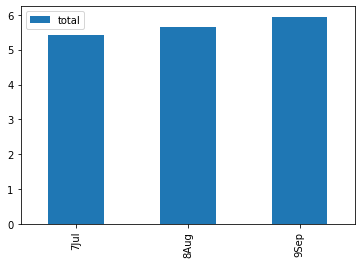

In [29]:
# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul, inv_aug, inv_sep], 
                            keys=['7Jul','8Aug','9Sep'])

# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({'total':'mean'})

# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

### Using the append method

In [31]:
# import data
invoice_items = pd.read_csv("../datasets/invoice_items.csv")

In [32]:
# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master, tracks_st], sort=False)

# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on='tid')

# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values(['quantity'], ascending=False))

                              quantity
tid  name                             
1853 Battery                         2
1876 For Whom The Bell Tolls         2
1854 Master Of Puppets               1
1857 Disposable Heroes               1
1875 Ride The Lightning              1
1877 Fade To Black                   1
1882 Frantic                         1
1884 Some Kind Of Monster            1
1886 Invisible Kid                   1


# Verifying Integrity

### Concatenate and merge to find common songs

In [34]:
# load data
classic_18 = pd.read_csv("../datasets/classic_18.csv")
classic_19 = pd.read_csv("../datasets/classic_19.csv")
pop_18 = pd.read_csv("../datasets/pop_18.csv")
pop_19 = pd.read_csv("../datasets/pop_19.csv")

In [35]:
# Concatenate the classic tables vertically
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index=True)

# Concatenate the pop tables vertically
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index=True)

# Merge classic_18_19 with pop_18_19
classic_pop = classic_18_19.merge(pop_18_19, on="tid", how="inner")

# Using .isin(), filter classic_18_19 rows where tid is in classic_pop
popular_classic = classic_18_19[classic_18_19["tid"].isin(classic_pop["tid"])]

# Print popular chart
print(popular_classic)

    pid   tid
3    12  3479
10   12  3439
21   12  3445
23   12  3449
48   12  3437
50   12  3435
